# Otros usos de aprendizaje no-supervisado


## Grafos

Se conoce por `grafo` a un conjunto de vértices V que se unen entre sí a partir de arcos. Cada arco tiene un peso numérico que es proporcional a una medida de similitud entre los dos vértices que une. 

Es importante resaltar que los arcos podrán ser dirigidos o no dirigidos. Si un grafo está compuesto únicamente por arcos dirigidos, el grafo será dirigido; de la misma manera, si el grafo está compuesto únicamente por arcos no dirigidos, será un grafo no dirigido; finalmente, si el grafo tiene tanto arcos dirigidos
como no dirigidos, recibirá el nombre de grafo híbrido.

## Segmentación mediante grafos

Segmentación por grafos (GBS) implica la aplicación de una teoría de grafos para construir una representación de una imagen en forma de gráfico. En este enfoque, cada píxel de la imagen se representa como un nodo, mientras que los bordes que conectan los nodos representan el grado de similitud entre los píxeles correspondientes.

El objetivo principal de `GBS` es dividir una imagen en regiones separadas, cada una de las cuales representa un segmento de la imagen.

Además, `GBS` utiliza algoritmos de partición de gráficos con el objetivo de reducir el costo de separar segmentos en la imagen minimizando el peso total de los bordes que deben cortarse.

Los algoritmos `GBS` siguen un conjunto de pasos estándar para segmentar imágenes. Por lo tanto, esta sección describe los pasos involucrados en la misma.

- En el primer paso, construimos un grafo para representar la imagen, donde cada píxel es un nodo. Entonces, debemos definir los pesos de las aristas entre los nodos. Se basa en la similitud o disimilitud entre los píxeles, como la diferencia de color o valores de intensidad.

- Luego, dividimos el grafo en regiones disjuntas empleando un algoritmo de partición de grafo. El objetivo de este algoritmo es minimizar los pesos de los bordes entre los segmentos.

- Finalmente, refinamos los segmentos fusionándolos o dividiéndolos según varios criterios, como tamaño, forma o textura.

La siguiente figura muestra los pasos del GBS y cómo se transforma una imagen en una imagen segmentada:


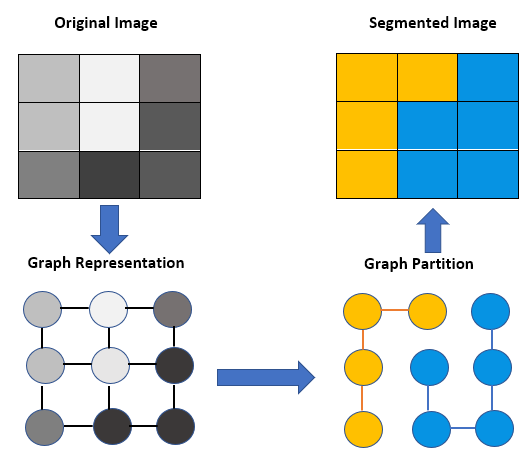


Este algoritmo construye primero un grafo de adyacencia de regiones y luego realiza el corte mínimo normalizado.

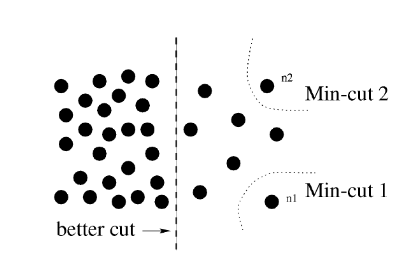

El siguiente ejemplo construye un grafo de adyacencia de regiones (RAG) y fusiona regiones que son similares en color. Construimos un RAG y definimos los bordes como la diferencia de color medio. Luego unimos regiones con color medio similar.

### Corte normalizado

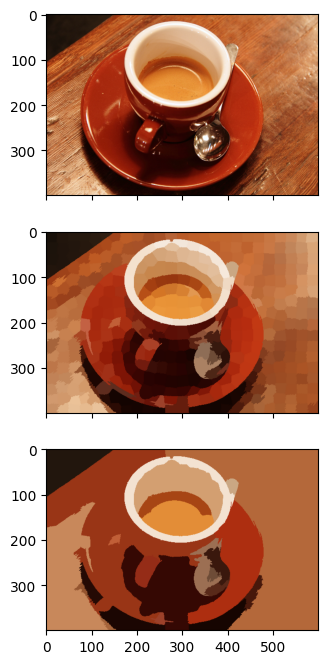

In [39]:
from skimage import data, segmentation, color
#from skimage.future import graph
from matplotlib import pyplot as plt
from skimage import graph

img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(img)
ax[1].imshow(out1)
ax[2].imshow(out2)